In [1]:
import sys
import os
import warnings
sys.path.append("../")
warnings.filterwarnings('ignore')

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import pandas as pd
import tensorflow as tf

2023-05-13 17:08:59.753477: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_set = pd.read_csv("../CBIS-DDSM/csv/train.csv", index_col=0)
test_set = pd.read_csv("../CBIS-DDSM/csv/test.csv", index_col=0)
dicom_dataset = pd.read_csv("../CBIS-DDSM/csv/dicom_info.csv")

### Creating the preprocessed dataset for the whole image

In [4]:
new_dataset_train_path = "../preprocessed_dataset/train/"
new_dataset_val_path = "../preprocessed_dataset/validation/"

if not os.path.exists(new_dataset_train_path):
    os.makedirs(new_dataset_train_path+'MALIGNANT')
    os.makedirs(new_dataset_train_path+'BENIGN')
if not os.path.exists(new_dataset_val_path):
    os.makedirs(new_dataset_val_path+'MALIGNANT')
    os.makedirs(new_dataset_val_path+'BENIGN')

In [5]:
# images = []
# clahe=cv2.createCLAHE(clipLimit=40)

# for p_id, label, image_path in train_set.values:
#     image = cv2.imread(image_path, 0)
#     gray_img_eqhist=cv2.equalizeHist(image)
#     gray_clahe_image = cv2.cvtColor(clahe.apply(gray_img_eqhist), cv2.COLOR_GRAY2RGB)
#     image = tf.image.resize(gray_clahe_image, (229, 229)).numpy().astype("uint8")
#     save_dir = os.path.join(new_dataset_train_path, label, p_id+'.jpg')
#     cv2.imwrite(save_dir, image)

In [6]:
# for p_id, label, image_path in test_set.values:
#     image = cv2.imread(image_path, 0)
#     gray_img_eqhist=cv2.equalizeHist(image)
#     gray_clahe_image = cv2.cvtColor(clahe.apply(gray_img_eqhist), cv2.COLOR_GRAY2RGB)
#     image = tf.image.resize(gray_clahe_image, (229, 229)).numpy().astype("uint8")
#     save_dir = os.path.join(new_dataset_val_path, label, p_id+'.jpg')
#     cv2.imwrite(save_dir, image)

### mass-dataset cropped updated paths

In [4]:
mass_train = pd.read_csv("../CBIS-DDSM/csv/mass_case_description_train_set.csv")
mass_test = pd.read_csv("../CBIS-DDSM/csv/mass_case_description_test_set.csv")

In [5]:
def generate_p_ids(df, dicom_dataset, dataset_type):
    p_ids = []
    for i, data in enumerate(df[["patient_id", "left or right breast", "image view", "abnormality id"]].values):

        p_id, side, view, abnormalitiy_id = data
        full_image_id = dataset_type + "_" + p_id + "_" + side + "_" + view 
        cropped_image_id = dataset_type + "_" + p_id + "_" + side + "_" + view + "_" + str(abnormalitiy_id)
        roi_image_path = dataset_type + "_" + p_id + "_" + side + "_" + view + "_" + str(abnormalitiy_id)
        
        full_image_series = dicom_dataset[["image_path", "PatientID", "SeriesDescription"]][(dicom_dataset["PatientID"] == full_image_id) & 
                                                                (dicom_dataset["SeriesDescription"] == "full mammogram images")]
        cropped_path_series = dicom_dataset[["image_path", "PatientID", "SeriesDescription"]][(dicom_dataset["PatientID"] == cropped_image_id) & 
                                                                (dicom_dataset["SeriesDescription"] == "cropped images")] 
        roi_path_series = dicom_dataset[["image_path", "PatientID", "SeriesDescription"]][(dicom_dataset["PatientID"] == roi_image_path) & 
                                                                (dicom_dataset["SeriesDescription"] == "ROI mask images")]
        
        
        if len(full_image_series.values) > 0:
            full_image_path = "../" + full_image_series.values[0][0]
            df["image file path"][i] = full_image_path
        else:
            df["image file path"][i] = "na"
            
        if len(cropped_path_series.values) > 0:
            cropped_image_path = "../" + cropped_path_series.values[0][0]
            df["cropped image file path"][i] = cropped_image_path
        else:
            df["cropped image file path"][i] = "na"
            
        if len(roi_path_series.values) > 0:
            roi_image_path = "../" + roi_path_series.values[0][0]
            df["ROI mask file path"][i] = roi_image_path
        else:
            df["ROI mask file path"][i] = "na"
            
    return df

In [6]:
mass_train = mass_train[mass_train["pathology"].isin(['MALIGNANT', 'BENIGN'])].reset_index()
mass_test = mass_test[mass_test["pathology"].isin(['MALIGNANT', 'BENIGN'])].reset_index()

In [7]:
mass_train_df = generate_p_ids(mass_train, dicom_dataset, "Mass-Training")
mass_test_df = generate_p_ids(mass_test, dicom_dataset, "Mass-Test")

In [ ]:
# mass_train_df.to_csv("../CBIS-DDSM/csv/mass_train_updated.csv")
# mass_test_df.to_csv("../CBIS-DDSM/csv/mass_test_updated.csv")

### calcification-dataset updated paths

In [8]:
calc_train = pd.read_csv("../CBIS-DDSM/csv/calc_case_description_train_set.csv")
calc_test = pd.read_csv("../CBIS-DDSM/csv/calc_case_description_test_set.csv")

In [9]:
calc_train = calc_train[calc_train["pathology"].isin(['MALIGNANT', 'BENIGN'])].reset_index()
calc_test = calc_test[calc_test["pathology"].isin(['MALIGNANT', 'BENIGN'])].reset_index()

In [10]:
calc_train_df = generate_p_ids(calc_train, dicom_dataset, "Calc-Training")
calc_test_df = generate_p_ids(calc_test, dicom_dataset, "Calc-Test")

In [12]:
# calc_train_df.to_csv("../CBIS-DDSM/csv/calc_train_updated.csv")
# calc_test_df.to_csv("../CBIS-DDSM/csv/calc_test_updated.csv")

##### Creating combined dataset

In [12]:
m_train_df = mass_train_df.copy()
m_test_df = mass_test_df.copy()
c_train_df = calc_train_df.copy()
c_test_df = calc_test_df.copy()

In [13]:
len(m_train_df.columns) == len(c_train_df.columns)

True

In [15]:
for i in range(len(m_train_df)):
    if m_train_df["pathology"][i] == "MALIGNANT":
        m_train_df["pathology"][i] = "MASS_MALIGNANT"
    else:
        m_train_df["pathology"][i] = "MASS_BENIGN"

for i in range(len(m_test_df)):
    if m_test_df["pathology"][i] == "MALIGNANT":
        m_test_df["pathology"][i] = "MASS_MALIGNANT"
    else:
        m_test_df["pathology"][i] = "MASS_BENIGN"

In [16]:
for i in range(len(c_train_df)):
    if c_train_df["pathology"][i] == "MALIGNANT":
        c_train_df["pathology"][i] = "CALCIFICATION_MALIGNANT"
    else:
        c_train_df["pathology"][i] = "CALCIFICATION_BENIGN"

for i in range(len(c_test_df)):
    if c_test_df["pathology"][i] == "MALIGNANT":
        c_test_df["pathology"][i] = "CALCIFICATION_MALIGNANT"
    else:
        c_test_df["pathology"][i] = "CALCIFICATION_BENIGN"

In [17]:
train_df = pd.concat([m_train_df, c_train_df], ignore_index=True, sort=False)

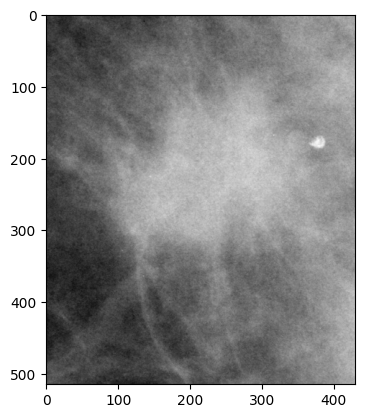

In [23]:
plt.imshow(cv2.imread(train_df["cropped image file path"][0]))

In [19]:
test_df = pd.concat([m_test_df, c_test_df], ignore_index=True, sort=False)

In [21]:
train_df.to_csv("../CBIS-DDSM/csv/combined_train_df.csv")
test_df.to_csv("../CBIS-DDSM/csv/combined_test_df.csv")

## Testing CLAHE

In [13]:
mass_train["image file path"][0]

'../CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg'

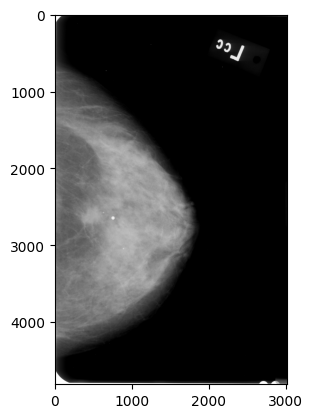

In [24]:
image = cv2.imread(mass_train["image file path"][0], 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [25]:
hist,bins = np.histogram(image.flatten(),256,[0,256]) 

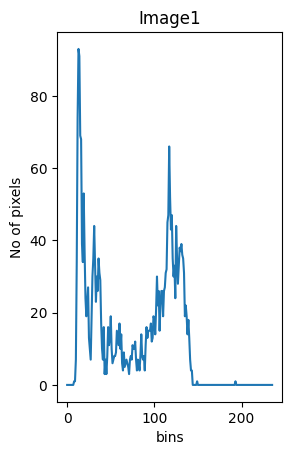

In [33]:
hist=cv2.calcHist(image,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist[10:-10])
plt.show()

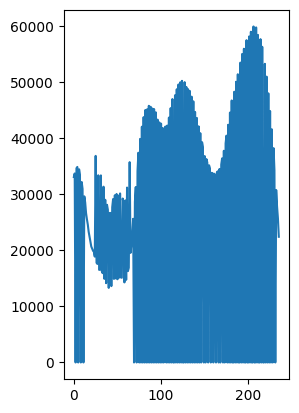

In [34]:
gray_img_eqhist=cv2.equalizeHist(image)
hist,bins = np.histogram(gray_img_eqhist.flatten(),256,[0,256])
plt.subplot(121)
plt.plot(hist[10:-10])
plt.show()

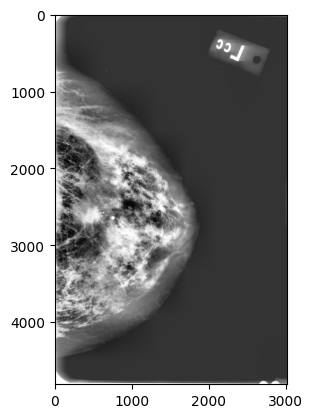

In [35]:
clahe=cv2.createCLAHE(clipLimit=50)
gray_img_clahe=cv2.cvtColor(clahe.apply(gray_img_eqhist), cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(gray_img_clahe, cv2.COLOR_BGR2RGB))